In [20]:
import scanpy as sc

adata = sc.datasets.pbmc3k_processed()

# Run leiden clustering for different resolutions
for resolution in [0.2, 0.4, 0.6, 0.8, 1.0]:
    sc.tl.leiden(
        adata,
        resolution=resolution,
        flavor="igraph",
        n_iterations=2,
        key_added=f"leiden_{str(resolution).replace('.', '_')}",
    )

In [21]:
from pyclustree import clustree

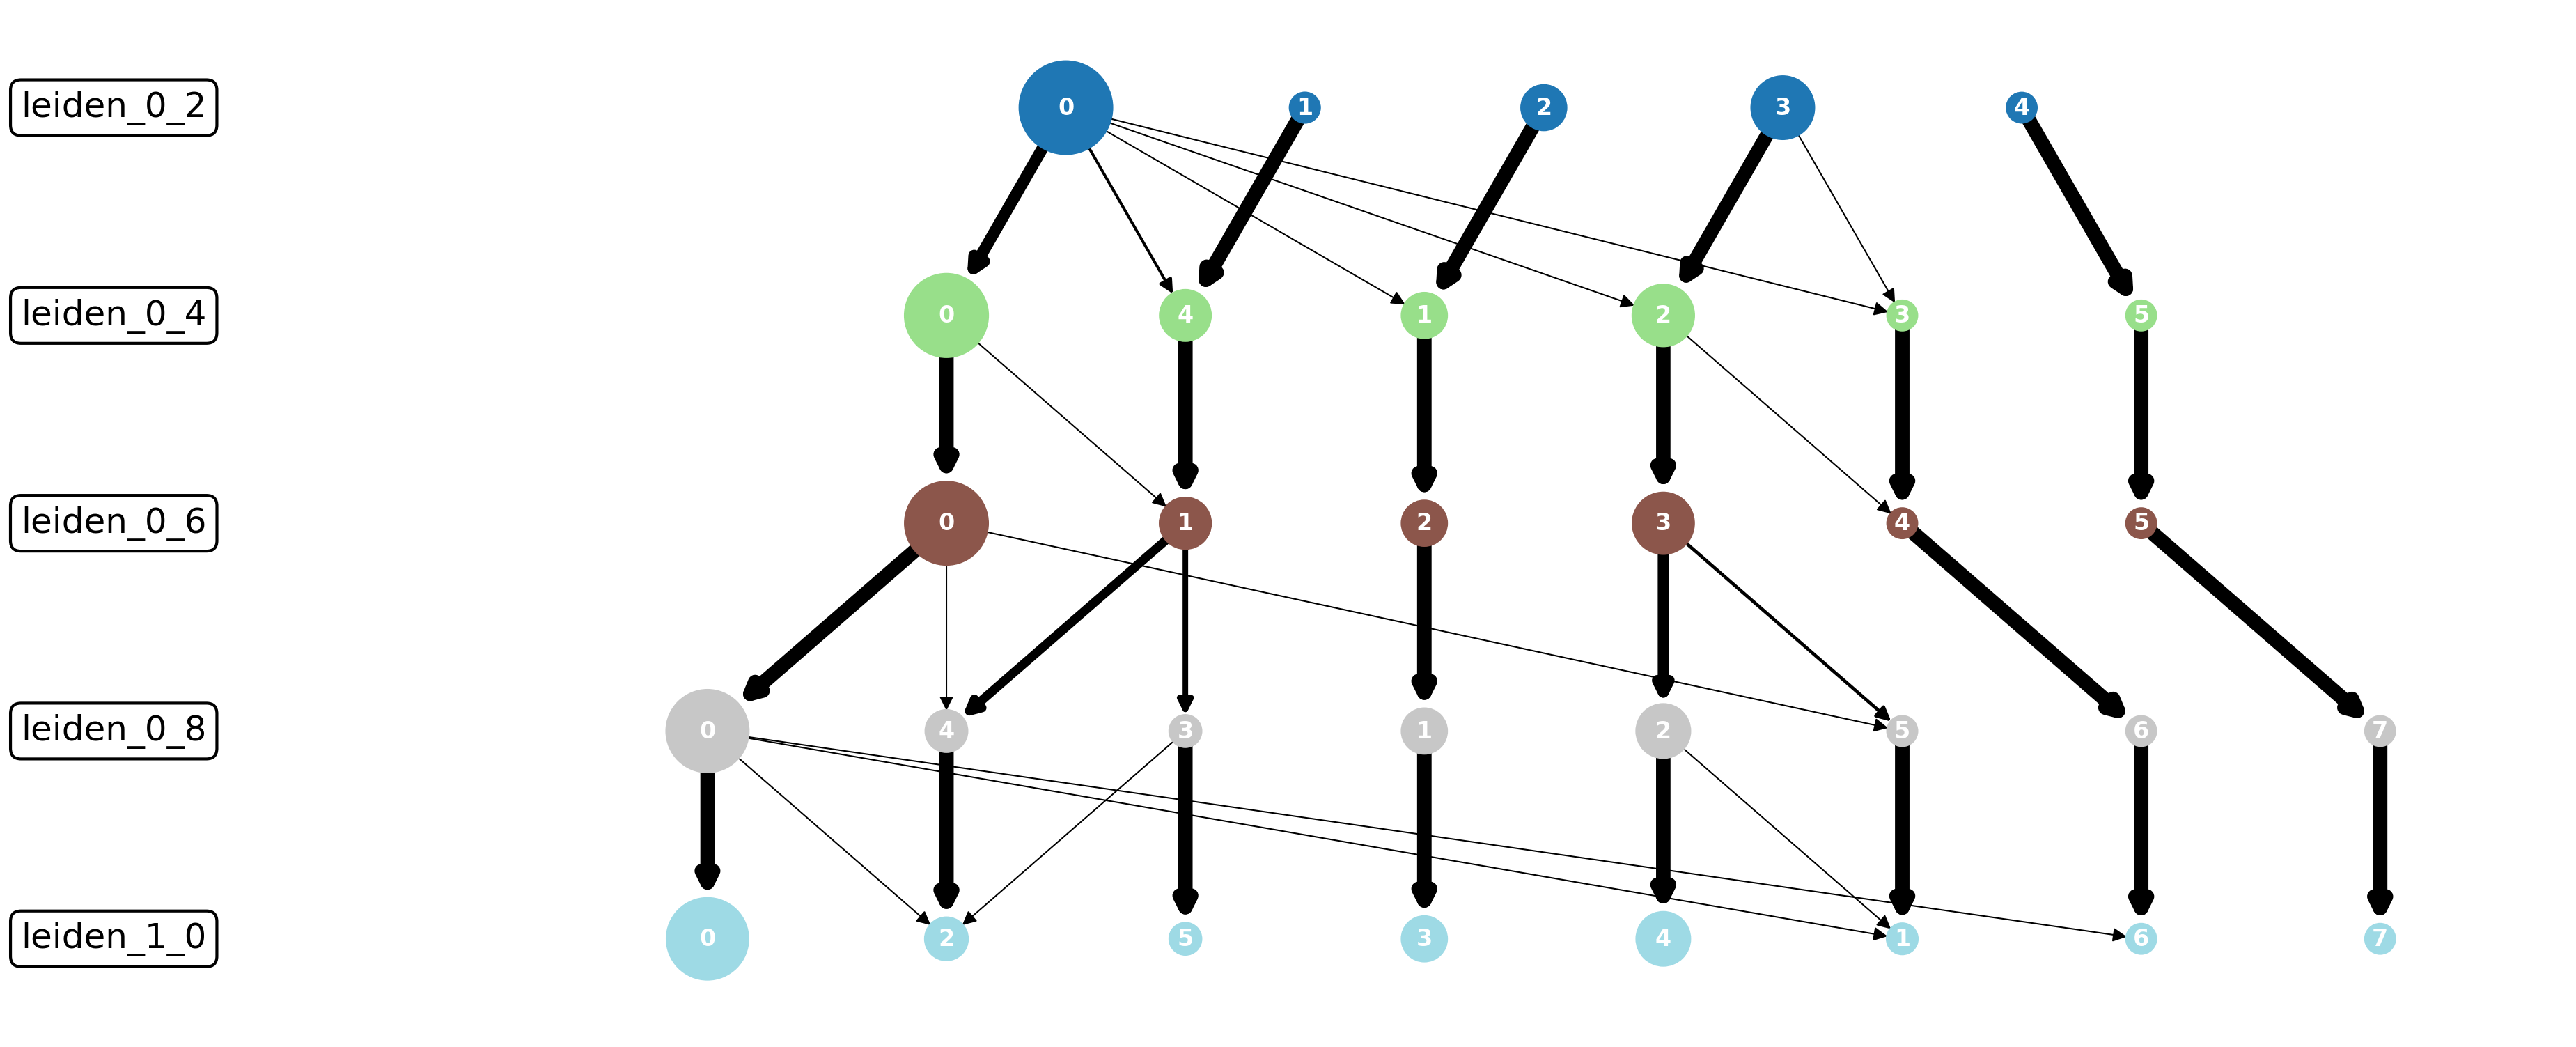

In [22]:
# Create a clustree visualization
cluster_keys = [f"leiden_{str(resolution).replace('.', '_')}" for resolution in [0.2, 0.4, 0.6, 0.8, 1.0]]
fig = clustree(
    adata,
    cluster_keys=cluster_keys,
    transition_plot="sankey",
)

In [23]:
import pandas as pd

df_cluster_assignments = adata.obs[cluster_keys]

transition_matrices = [
    pd.crosstab(
        df_cluster_assignments[cluster_keys[i]],
        df_cluster_assignments[cluster_keys[i + 1]],
    )
    for i in range(len(cluster_keys) - 1)
]

In [24]:
df_cluster_assignments

,leiden_0_2,leiden_0_4,leiden_0_6,leiden_0_8,leiden_1_0
index,,,,,
AAACATACAACCAC-1,0,0,0,0,0
AAACATTGAGCTAC-1,2,1,2,1,3
AAACATTGATCAGC-1,0,0,0,0,0
AAACCGTGCTTCCG-1,3,2,3,2,4
AAACCGTGTATGCG-1,1,4,1,3,5
...,...,...,...,...,...
TTTCGAACTCTCAT-1,3,2,3,2,4
TTTCTACTGAGGCA-1,2,1,2,1,3
TTTCTACTTCCTCG-1,2,1,2,1,3


In [25]:
from matplotlib_sankey import from_matrix

all_matrices = []
for i in range(len(cluster_keys) - 1):
    all_matrices.append(
        from_matrix(
            transition_matrices[i].to_numpy(),
            source_indicies=transition_matrices[i].index.tolist(),
            target_indicies=transition_matrices[i].columns.tolist(),
        )
    )

<Axes: title={'center': 'Clustree of PBMC68k'}>

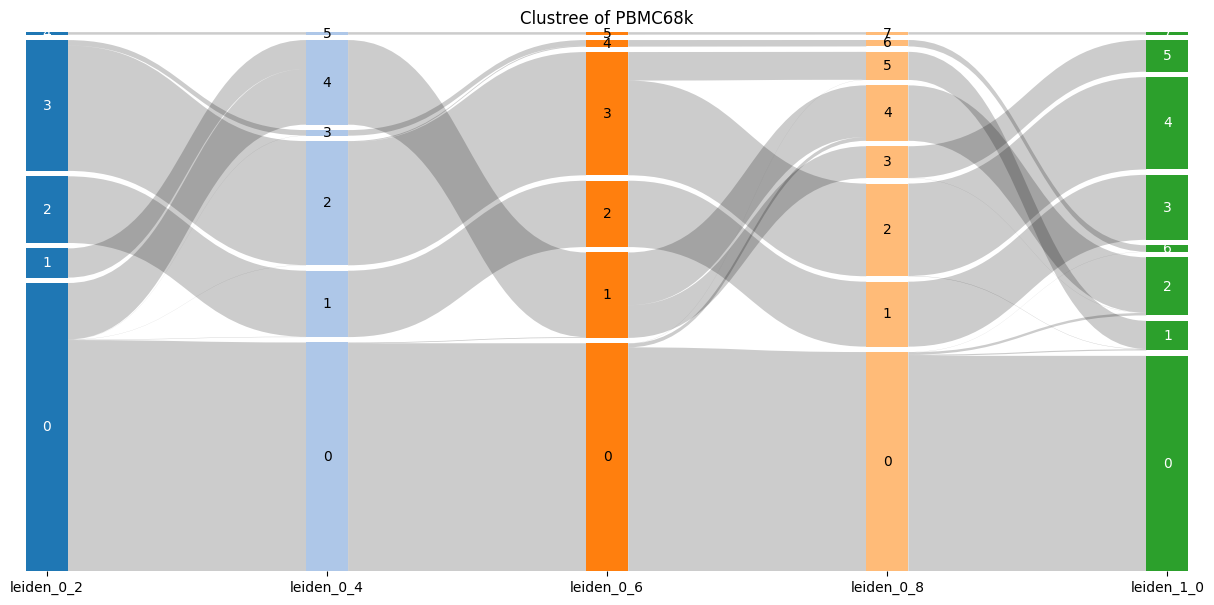

In [35]:
import matplotlib.pyplot as plt
from matplotlib_sankey import sankey
from matplotlib_sankey._colors import colormap_to_list

fig, ax = plt.subplots(figsize=(15, 7))
sankey(
    all_matrices,
    color=colormap_to_list(name="tab20", num=len(all_matrices) + 1),
    ax=ax,
    spacing=0.01,
    column_labels=cluster_keys,
    annotate_columns="index",
    title="Clustree of PBMC68k",
)

In [27]:
import numpy as np

In [37]:
node_expr: dict[str, dict[str, float]] = {}

for key in cluster_keys:
    node_expr[key] = {}
    for cluster_key_name in adata.obs[key].unique():
        node_expr[key][cluster_key_name] = np.mean(
            adata[(adata.obs[key] == cluster_key_name), ["TNFRSF4"]].X,
            axis=0,
        )[0]

In [53]:
from matplotlib import colormaps
from matplotlib.colors import ListedColormap, Normalize

In [50]:
norm = Normalize(
    np.hstack([list(v.values()) for v in node_expr.values()]).flatten().min(),
    np.hstack([list(v.values()) for v in node_expr.values()]).flatten().max(),
)

In [60]:
cmap_reds = colormaps.get("Reds")

In [58]:
# ListedColormap(colormap_to_list(name="Reds", num=5))

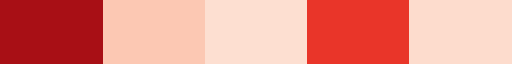

In [67]:
ListedColormap([cmap_reds(norm(node_expr["leiden_0_2"][key])) for key in node_expr["leiden_0_2"].keys()])

TypeError: unhashable type: 'LinearSegmentedColormap'

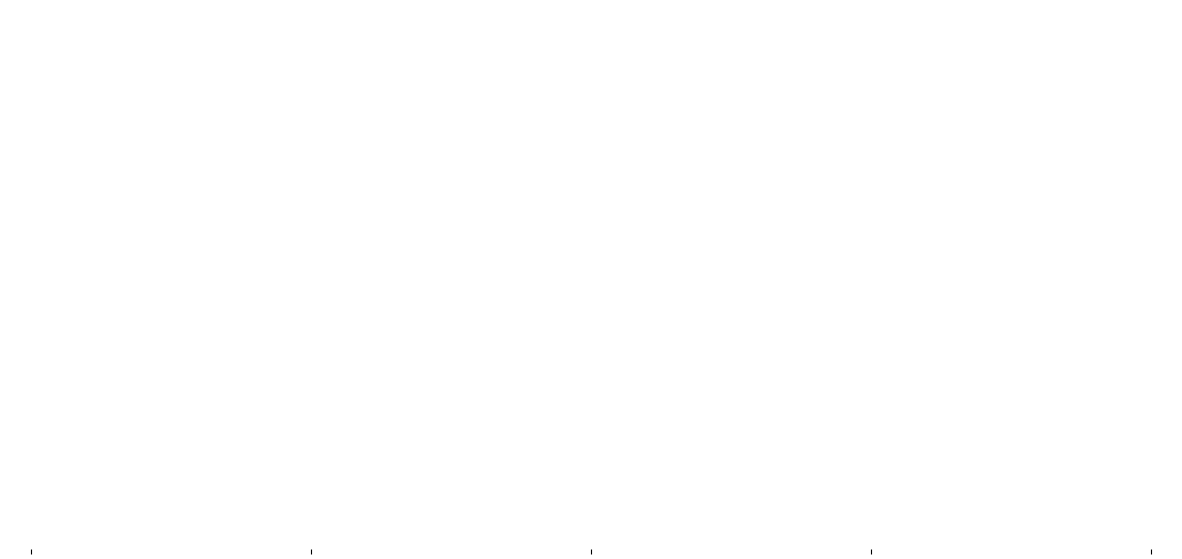

In [71]:
# Add expression as color code


import matplotlib.pyplot as plt
from matplotlib_sankey import sankey
from matplotlib_sankey._colors import colormap_to_list

fig, ax = plt.subplots(figsize=(15, 7))
sankey(
    all_matrices,
    # color=colormap_to_list(name="tab20", num=len(all_matrices) + 1),
    color=[
        colormaps["Reds"],
        "tab10",
        "tab10",
        "tab10",
        "tab10",
    ],
    ax=ax,
    spacing=0.01,
    column_labels=cluster_keys,
    annotate_columns="index",
    title="Clustree of PBMC68k",
)